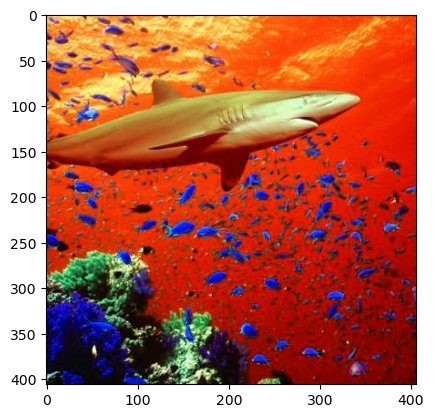

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

img = cv2.imread("seaanimal.jpg")
plt.imshow(img)

### hue saturation

Text(0.5, 1.0, 'HUE SATURATED IMAGE')

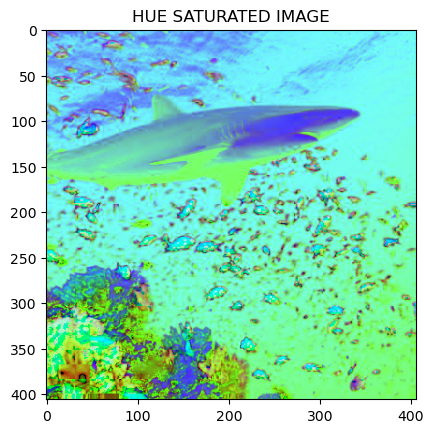

In [7]:
import cv2
import matplotlib.pyplot as plt


hsv_img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
plt.imshow(img)
plt.title('ORIGINAL IMAGE')

plt.imshow(hsv_img)
plt.title('HUE SATURATED IMAGE')

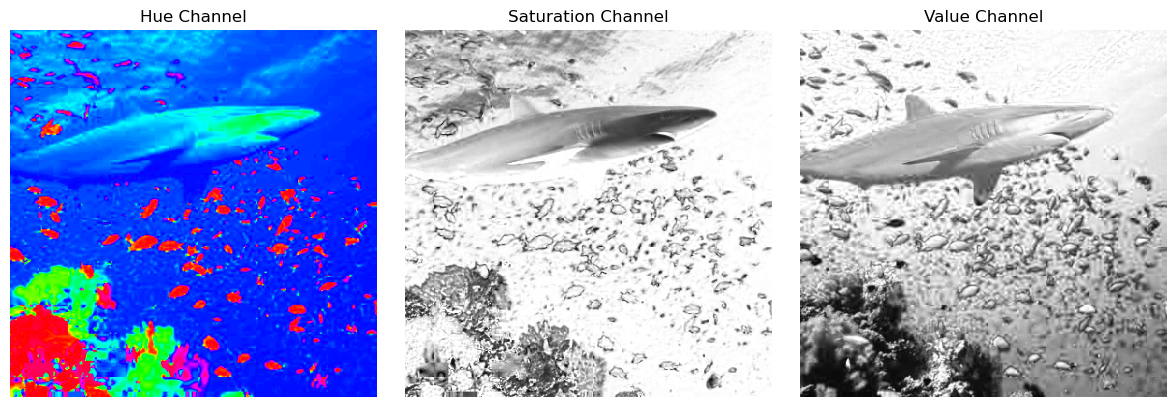

In [22]:
hsv_img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)


H, S, V = cv2.split(hsv_img)

cv2.imwrite('H_channel.jpg', H)
cv2.imwrite('S_channel.jpg', S)
cv2.imwrite('V_channel.jpg', V)

plt.figure(figsize=(12, 4))

# Hue channel
plt.subplot(131)
plt.imshow(H, cmap='hsv')
plt.title('Hue Channel')
plt.axis('off')

# Saturation channel
plt.subplot(132)
plt.imshow(S, cmap='gray')
plt.title('Saturation Channel')
plt.axis('off')

# Value channel
plt.subplot(133)
plt.imshow(V, cmap='gray')
plt.title('Value Channel')
plt.axis('off')

plt.tight_layout()
plt.show()

### rgb channel

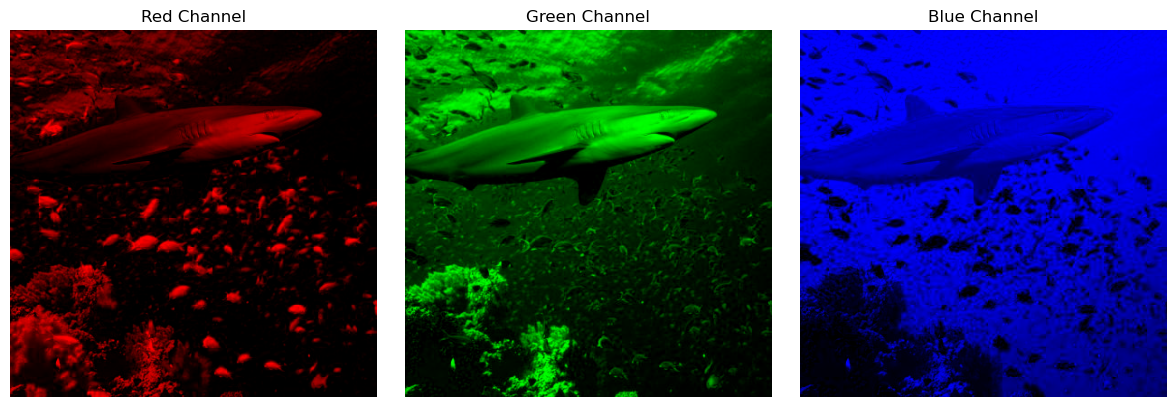

In [21]:
blue_channel, green_channel, red_channel = cv2.split(img)


red_only = cv2.merge([np.zeros_like(red_channel), np.zeros_like(green_channel), red_channel])
green_only = cv2.merge([np.zeros_like(red_channel), green_channel, np.zeros_like(blue_channel)])
blue_only = cv2.merge([blue_channel, np.zeros_like(green_channel), np.zeros_like(red_channel)])

cv2.imwrite('red_channel.jpg', red_only)
cv2.imwrite('green_channel.jpg', green_only)
cv2.imwrite('blue_channel.jpg', blue_only)

plt.figure(figsize=(12, 4))

plt.subplot(131)
plt.imshow(cv2.cvtColor(red_only, cv2.COLOR_BGR2RGB))  
plt.title('Red Channel')
plt.axis('off')

plt.subplot(132)
plt.imshow(cv2.cvtColor(green_only, cv2.COLOR_BGR2RGB))  
plt.title('Green Channel')
plt.axis('off')

plt.subplot(133)
plt.imshow(cv2.cvtColor(blue_only, cv2.COLOR_BGR2RGB)) 
plt.title('Blue Channel')
plt.axis('off')

plt.tight_layout()
plt.show()


### cmy conversion

[array([[0.65098039, 0.74117647, 0.77647059, ..., 1.        , 0.99607843,
        0.97254902],
       [0.63137255, 0.63137255, 0.58039216, ..., 1.        , 1.        ,
        0.98823529],
       [0.62745098, 0.57254902, 0.48235294, ..., 1.        , 1.        ,
        0.98823529],
       ...,
       [0.83137255, 0.9254902 , 0.94901961, ..., 1.        , 1.        ,
        1.        ],
       [0.78823529, 0.94117647, 0.97254902, ..., 1.        , 1.        ,
        1.        ],
       [0.76862745, 0.91372549, 0.92156863, ..., 1.        , 1.        ,
        1.        ]]), array([[0.34117647, 0.41568627, 0.42352941, ..., 0.82352941, 0.80784314,
        0.78431373],
       [0.36862745, 0.35686275, 0.28627451, ..., 0.81568627, 0.80784314,
        0.79215686],
       [0.41568627, 0.36862745, 0.27843137, ..., 0.80392157, 0.80392157,
        0.79215686],
       ...,
       [0.81568627, 0.91372549, 0.9372549 , ..., 0.98039216, 0.98039216,
        0.98039216],
       [0.77647059, 0.93333333, 0

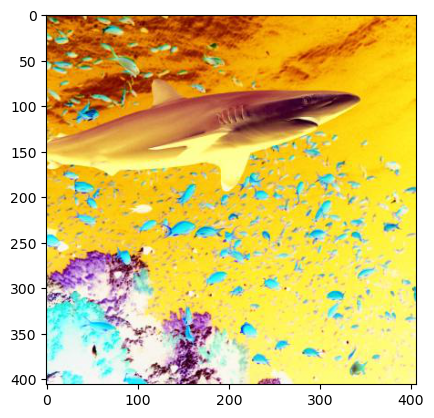

In [11]:
b, g, r=cv2.split(img)

def rgb_to_cmy(r, g, b):
   
    c = 1 - r / 255
    m = 1 - g / 255
    y = 1 - b / 255
    return (c, m, y)
 
c,m,y=rgb_to_cmy(r,g,b)
print([c,m,y])
 

cmy = np.zeros((406,406, 3))
cmy[:,:,0] = c  
cmy[:,:,1] = m  
cmy[:,:,2] = y  

plt.imshow(cmy)
plt.show()

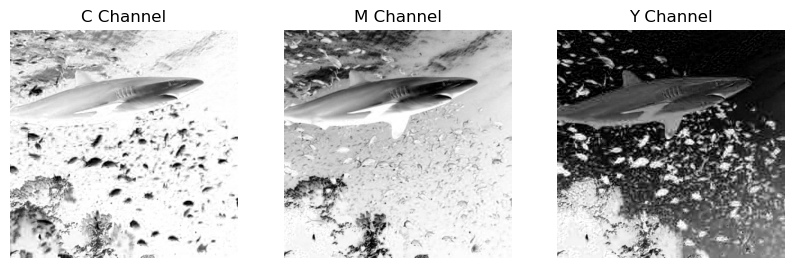

In [14]:
plt.figure(figsize=(10, 3))

plt.subplot(1, 3, 1)
plt.imshow(cmy[:, :, 0], cmap='gray')
plt.title('C Channel')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(cmy[:, :, 1], cmap='gray')
plt.title('M Channel')
plt.axis('off')


plt.subplot(1, 3, 3)
plt.imshow(cmy[:, :, 2], cmap='gray')
plt.title('Y Channel')
plt.axis('off')


plt.show()


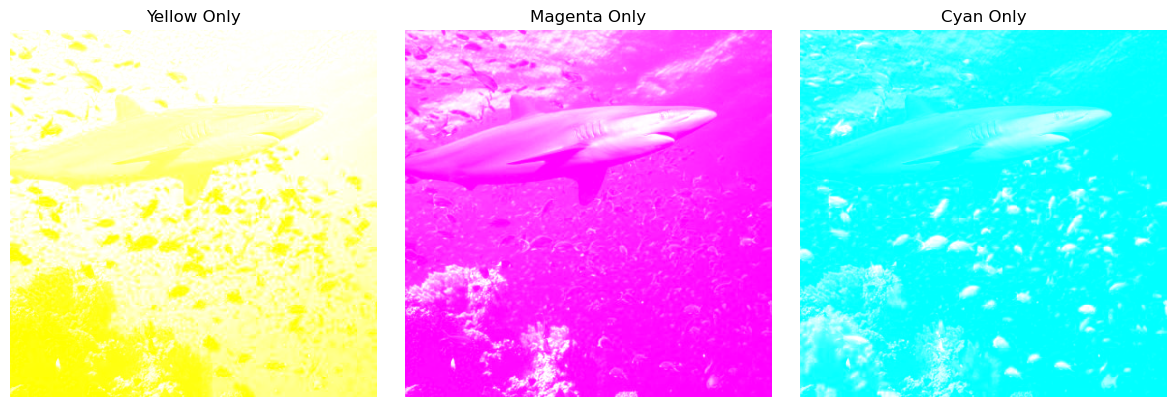

In [24]:
rgb_image = img

rgb_image = cv2.cvtColor(rgb_image, cv2.COLOR_BGR2RGB)

cmyk_image = 1 - rgb_image / 255.0 

c, m, y = cv2.split(cmyk_image)

cmyk_image_cy_mg_zero = cv2.merge([np.zeros_like(c), np.zeros_like(m), y])

cmyk_image_cy_yl_zero = cv2.merge([np.zeros_like(c), m, np.zeros_like(y)])

cmyk_image_mg_yl_zero = cv2.merge([c, np.zeros_like(m), np.zeros_like(y)])

rgb_cy_mg_zero = 255 * (1 - np.dstack([cmyk_image_cy_mg_zero[:, :, 0], cmyk_image_cy_mg_zero[:, :, 1], cmyk_image_cy_mg_zero[:, :, 2]]))
rgb_cy_yl_zero = 255 * (1 - np.dstack([cmyk_image_cy_yl_zero[:, :, 0], cmyk_image_cy_yl_zero[:, :, 1], cmyk_image_cy_yl_zero[:, :, 2]]))
rgb_mg_yl_zero = 255 * (1 - np.dstack([cmyk_image_mg_yl_zero[:, :, 0], cmyk_image_mg_yl_zero[:, :, 1], cmyk_image_mg_yl_zero[:, :, 2]]))

plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.imshow(rgb_cy_mg_zero.astype(np.uint8))
plt.title("Yellow Only")
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(rgb_cy_yl_zero.astype(np.uint8))
plt.title("Magenta Only")
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(rgb_mg_yl_zero.astype(np.uint8))
plt.title("Cyan Only")
plt.axis('off')
plt.tight_layout()
plt.show()